In [115]:
import pandas as pd
import pycaret
import numpy as np
import matplotlib.pyplot as plt

In [116]:
data = pd.read_csv('etfs_dataset_modelling.csv')

In [117]:
data.dropna(inplace=True)

#### Preprocessing and cleaning for Time Series (hacer función o pipeline)

In [118]:
data = data.rename(columns={'Unnamed: 0': 'Series'})
data

,Series,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,RSI_25,ewma_7,ewma_50,ewma_200,Close_target
25,25,FGDL,2022-08-05 00:00:00-04:00,23.820000,23.820000,23.768000,23.768000,210200.0,0.0,0.0,96.519827,57.326070,0.000000,23.655462,23.651515,23.995224,23.952000
26,26,FGDL,2022-08-08 00:00:00-04:00,23.900999,23.952000,23.900999,23.952000,200.0,0.0,0.0,100.000000,62.375775,0.000000,23.729596,23.663299,23.994794,24.049999
27,27,FGDL,2022-08-09 00:00:00-04:00,24.016001,24.070000,24.016001,24.049999,11300.0,0.0,0.0,100.000000,67.369977,38.395312,23.809697,23.678464,23.995344,23.975000
28,28,FGDL,2022-08-10 00:00:00-04:00,23.972000,23.975000,23.972000,23.975000,200.0,0.0,0.0,100.000000,78.593118,62.521736,23.851023,23.690093,23.995141,23.913000
29,29,FGDL,2022-08-11 00:00:00-04:00,23.913000,23.913000,23.913000,23.913000,0.0,0.0,0.0,100.000000,89.394880,72.365015,23.866517,23.698834,23.994324,24.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,3571480,AUGT,2024-07-02 00:00:00-04:00,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,100.000000,29.097374,28.455972,26.980250,29.267000
3571481,3571481,AUGT,2024-07-03 00:00:00-04:00,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,100.000000,29.139780,28.487777,27.003004,29.297001
3571482,3571482,AUGT,2024-07-05 00:00:00-04:00,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,100.000000,29.179086,28.519512,27.025830,29.332001
3571483,3571483,AUGT,2024-07-08 00:00:00-04:00,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,100.000000,29.217314,28.551374,27.048777,29.327000


##### Extraer fechas en formato que lean las series y eliminamos columnas no necesarias

In [119]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

data

,Series,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_9,RSI_14,RSI_25,ewma_7,ewma_50,ewma_200,Close_target
25,25,FGDL,2022-08-05 04:00:00+00:00,23.820000,23.820000,23.768000,23.768000,210200.0,0.0,0.0,96.519827,57.326070,0.000000,23.655462,23.651515,23.995224,23.952000
26,26,FGDL,2022-08-08 04:00:00+00:00,23.900999,23.952000,23.900999,23.952000,200.0,0.0,0.0,100.000000,62.375775,0.000000,23.729596,23.663299,23.994794,24.049999
27,27,FGDL,2022-08-09 04:00:00+00:00,24.016001,24.070000,24.016001,24.049999,11300.0,0.0,0.0,100.000000,67.369977,38.395312,23.809697,23.678464,23.995344,23.975000
28,28,FGDL,2022-08-10 04:00:00+00:00,23.972000,23.975000,23.972000,23.975000,200.0,0.0,0.0,100.000000,78.593118,62.521736,23.851023,23.690093,23.995141,23.913000
29,29,FGDL,2022-08-11 04:00:00+00:00,23.913000,23.913000,23.913000,23.913000,0.0,0.0,0.0,100.000000,89.394880,72.365015,23.866517,23.698834,23.994324,24.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571480,3571480,AUGT,2024-07-02 04:00:00+00:00,29.120001,29.195000,29.120001,29.195000,200.0,0.0,0.0,100.000000,100.000000,100.000000,29.097374,28.455972,26.980250,29.267000
3571481,3571481,AUGT,2024-07-03 04:00:00+00:00,29.221001,29.270000,29.180000,29.267000,2300.0,0.0,0.0,100.000000,100.000000,100.000000,29.139780,28.487777,27.003004,29.297001
3571482,3571482,AUGT,2024-07-05 04:00:00+00:00,29.240000,29.297001,29.240000,29.297001,500.0,0.0,0.0,100.000000,100.000000,100.000000,29.179086,28.519512,27.025830,29.332001
3571483,3571483,AUGT,2024-07-08 04:00:00+00:00,29.299999,29.340000,29.299999,29.332001,600.0,0.0,0.0,100.000000,100.000000,100.000000,29.217314,28.551374,27.048777,29.327000


In [120]:
data['Date'] = data['Date'].dt.date

In [121]:
data = data[['Date', 'Close','Ticker']] 

data.head()

,Date,Close,Ticker
25,2022-08-05,23.768000,FGDL
26,2022-08-08,23.952000,FGDL
27,2022-08-09,24.049999,FGDL
28,2022-08-10,23.975000,FGDL
29,2022-08-11,23.913000,FGDL


Primero separamos el dataset por Ticker. Nos devuelve una lista de tuplas que contienen el nombre del Ticker en 0, y el dataframe en 1.

In [122]:
prueba = [data for data in data.groupby('Ticker')]
prueba[0][1].drop('Ticker', inplace=True, axis=1)
prueba = prueba[0][1]
prueba


,Date,Close
1173759,2020-10-14,24.703897
1173760,2020-10-15,24.703897
1173761,2020-10-16,24.703897
1173762,2020-10-19,24.698940
1173763,2020-10-20,24.703897
...,...,...
1174692,2024-07-02,25.049999
1174693,2024-07-03,25.049999
1174694,2024-07-05,25.056000
1174695,2024-07-08,25.059999


Date está como objeto y deberia estar como índice, por eso tengo problemas

In [123]:
prueba.dtypes

Date      object
Close    float64
dtype: object

In [124]:
prueba['Date'] = pd.to_datetime(prueba['Date'])


In [125]:
prueba.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [126]:
prueba.set_index('Date', inplace=True)

In [127]:
full_range = pd.date_range(start=prueba.index.min(), end=prueba.index.max(), freq='D')

In [128]:
full_range

DatetimeIndex(['2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23',
               ...
               '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03',
               '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07',
               '2024-07-08', '2024-07-09'],
              dtype='datetime64[ns]', length=1365, freq='D')

In [129]:
prueba = prueba.reindex(full_range)

In [130]:
prueba.dtypes

Close    float64
dtype: object

Como ahora hay valores NaN, debemos imputarlos. Lo más usado es la interpolacion

In [131]:
prueba.isnull().sum()

Close    427
dtype: int64

In [132]:
prueba_interpolated = prueba.interpolate()

In [133]:
prueba_interpolated.head(20)

,Close
2020-10-14,24.703897
2020-10-15,24.703897
2020-10-16,24.703897
2020-10-17,24.702245
2020-10-18,24.700593
2020-10-19,24.698940
2020-10-20,24.703897
2020-10-21,24.743572
2020-10-22,24.728693
2020-10-23,24.748526


<Axes: >

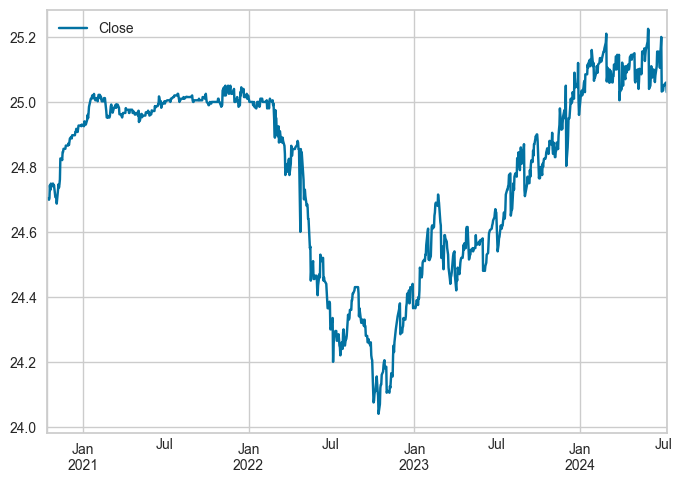

In [134]:
prueba_interpolated.plot()

In [135]:
print("\nDataFrame con Frecuencia Diaria Añadida:")
print(prueba_interpolated)
print("Frecuencia del índice actual:", prueba_interpolated.index.freq)


DataFrame con Frecuencia Diaria Añadida:
                Close
2020-10-14  24.703897
2020-10-15  24.703897
2020-10-16  24.703897
2020-10-17  24.702245
2020-10-18  24.700593
...               ...
2024-07-05  25.056000
2024-07-06  25.057333
2024-07-07  25.058666
2024-07-08  25.059999
2024-07-09  25.030001

[1365 rows x 1 columns]
Frecuencia del índice actual: <Day>


In [136]:
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment
from functions import *
import numpy as np

En esta funcion X_train e y_train es lo mismo, solo que divide la unica variable que hay ('Close')

In [137]:
def data_train_test(series):


    pct_train = int(len(series) * 0.6)
    pct_val = int(len(series) * 0.2)
    

    train = series[:pct_train]
    val = series[pct_train:pct_train + pct_val]
    test = series[pct_train + pct_val:]
    
    return train, val, test

# Uso de la función para dividir los datos
train, val, test = data_train_test(prueba_interpolated)


In [138]:
print(f"Tamaño total de la serie: {len(prueba_interpolated)}")
print(f"Tamaño del conjunto de entrenamiento: {len(train)}")
print(f"Tamaño del conjunto de validación: {len(val)}")
print(f"Tamaño del conjunto de prueba: {len(test)}")
print(f"Suma de todos los tamaños: {len(train) + len(val) + len(test)}")


Tamaño total de la serie: 1365
Tamaño del conjunto de entrenamiento: 819
Tamaño del conjunto de validación: 273
Tamaño del conjunto de prueba: 273
Suma de todos los tamaños: 1365


##### Una vez tenemos nuestra serie dividida vamos a entrenar los modelos que mas exito tuvieron en el Test02_Tseries

### Exponential Smoothing:

1. Descomponemos con el metodo 'additive' nuestra serie

2. Entrenamos con train sobre los residuales

3. Predecimos los residuales de validacion

4. Reconstruimos la serie sumando las predicciones de residuales con la tendencia y estacionalidad de validacion

5. Para predecir datos futuros que no podamos extraer la tendencia y estacionalidad, haremos la prediccion de residuales futuros y sumaremos la predicción de la tendencia y estacionalidad realizadas con modelos de regresion lineal.

#### Estrategia I: Descomposición serie

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score

# Descomposición aditiva. Vamos a seleccionar periodos semanales
decomposition = seasonal_decompose(train['Close'], model='additive', period=7) #¿Cambio el periodo?
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
residual = decomposition.resid.dropna()


<Figure size 3000x1300 with 0 Axes>

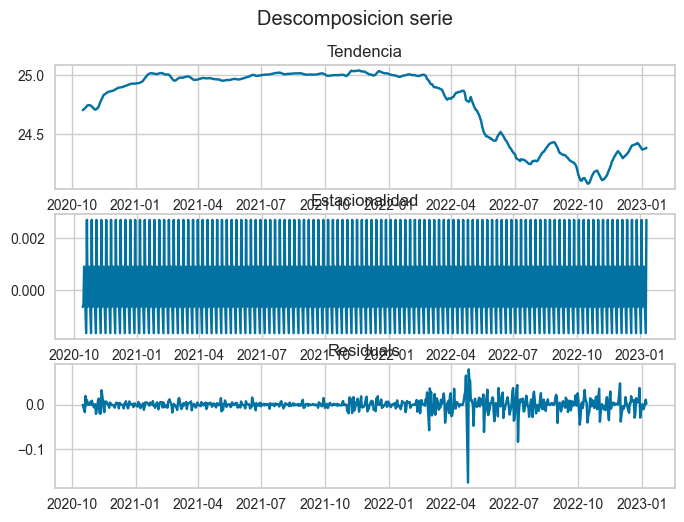

In [140]:
plt.figure(figsize=(30,13))

fig, axs = plt.subplots(3)
fig.suptitle(f'Descomposicion serie')
axs[0].plot(trend)
axs[0].set_title('Tendencia')
axs[1].plot(seasonal)
axs[1].set_title('Estacionalidad')
axs[2].plot(residual)
axs[2].set_title('Residuals')
plt.show()

plt.show()


In [141]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajuste del modelo
exp_smooth_model = ExponentialSmoothing(residual.dropna(), trend=None, seasonal=None)
exp_smooth_fit = exp_smooth_model.fit()

# Predicción de los residuales en el conjunto de validación
y_pred_residuals_exp = exp_smooth_fit.forecast(steps=len(val))

# Obtener los componentes de tendencia y estacionalidad correspondientes al conjunto de validación
# Tambien interpolamos los datos en caso de que se dieran Nans. En la tyendencia suele pasar

trend_validation = decomposition.trend[-len(val):].interpolate(method = 'linear')
seasonal_validation = decomposition.seasonal[:len(val)].interpolate(method='linear')



In [142]:
len(trend_validation.values)

273

In [143]:
len(seasonal_validation.values)

273

##### Reconstruccion con tendencia y estacionalidad

In [151]:
# Reconstruimos la serie sumando la prediccion de resiuals y la tendencia y estacionalidad extraidas de validation

y_pred_exp = trend_validation.values + seasonal_validation.values + y_pred_residuals_exp

# Evaluación del modelo comparando la prediccion de Close en val mediante la descomposición y el dato original de Close en validation
mse_exp = mean_squared_error(val['Close'], y_pred_exp)
r2_exp = r2_score(val['Close'], y_pred_exp)
print(f'MSE Exponential Smoothing: {mse_exp}')
print(f'R2 Exponential Smoothing: {r2_exp}')


MSE Exponential Smoothing: 0.12802350069292445
R2 Exponential Smoothing: -7.578532760852216


##### Reconstrucción solo con tendencia

In [145]:
# Reconstruimos la serie sumando la prediccion de resiuals y la tendencia y estacionalidad extraidas de validation

y_pred_exp = trend_validation.values + y_pred_residuals_exp

# Evaluación del modelo comparando la prediccion de Close en val mediante la descomposición y el dato original de Close en validation
mse_exp = mean_squared_error(val['Close'], y_pred_exp)
r2_exp = r2_score(val['Close'], y_pred_exp)
print(f'MSE Exponential Smoothing: {mse_exp}')
print(f'R2 Exponential Smoothing: {r2_exp}')

MSE Exponential Smoothing: 0.12803303700777727
R2 Exponential Smoothing: -7.579171765323583


#### Estrategia II: Modelacion serie completa (sale ago mejor)

In [149]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajuste del modelo
exp_smooth_model = ExponentialSmoothing(train.dropna(), trend='add', seasonal='add', seasonal_periods=24)
exp_smooth_fit = exp_smooth_model.fit()

# Predicción de los residuales en el conjunto de validación
y_pred_exp = exp_smooth_fit.forecast(steps=len(val))

mse_exp = mean_squared_error(val['Close'], y_pred_exp)
r2_exp = r2_score(val['Close'], y_pred_exp)
print(f'MSE Exponential Smoothing: {mse_exp}')
print(f'R2 Exponential Smoothing: {r2_exp}')

MSE Exponential Smoothing: 0.07256734168570313
R2 Exponential Smoothing: -3.8625550359846264
